In [1]:
import pandapower as pp #import pandapower
import numpy as np
import pandas as pd
import os
import random
import pandapower as pp
from pandapower.timeseries import DFData
from pandapower.timeseries import OutputWriter
from pandapower.timeseries.run_time_series import run_timeseries
from pandapower.control import ConstControl
net = pp.create_empty_network() #create an empty network

In [2]:
bus1 = pp.create_bus(net, name="HV Busbar", vn_kv=33, type="b")
bus2 = pp.create_bus(net, name="HV Transformer Bus", vn_kv=33, type="n")
bus3 = pp.create_bus(net, name="LV Transformer Bus", vn_kv=11, type="n")
for i in range(0,20):
    pp.create_bus(net, name='LV Bus %s' % i, vn_kv=11, type='b')
net.bus

,name,vn_kv,type,zone,in_service
0,HV Busbar,33.0,b,None,True
1,HV Transformer Bus,33.0,n,None,True
2,LV Transformer Bus,11.0,n,None,True
3,LV Bus 0,11.0,b,None,True
4,LV Bus 1,11.0,b,None,True
5,LV Bus 2,11.0,b,None,True
6,LV Bus 3,11.0,b,None,True
7,LV Bus 4,11.0,b,None,True
8,LV Bus 5,11.0,b,None,True
9,LV Bus 6,11.0,b,None,True


In [3]:
pp.create_ext_grid(net, bus1, vm_pu=1.02, va_degree=50) # Create an external grid connection

net.ext_grid #show external grid table

,name,bus,vm_pu,va_degree,slack_weight,in_service
0,None,0,1.02,50.0,1.0,True


In [4]:
hv_bus = pp.get_element_index(net, "bus", "HV Transformer Bus")
lv_bus = pp.get_element_index(net, "bus", "LV Transformer Bus")
pp.create_transformer_from_parameters(net, hv_bus, lv_bus, sn_mva=20, vn_hv_kv=33, vn_lv_kv=11, vkr_percent=0.06,
                                      vk_percent=8, pfe_kw=0, i0_percent=0, tp_pos=0, shift_degree=0, name='HV-LV-Trafo')

net.trafo # show trafo table

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,...,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service,tp_pos
0,HV-LV-Trafo,None,1,2,20.0,33.0,11.0,8.0,0.06,0.0,...,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True,0.0


In [5]:
test_type = {"r_ohm_per_km": 0.128, "x_ohm_per_km": 0.37, "c_nf_per_km": 0.2, "max_i_ka": 0.257, "type": "cs"}
pp.create_std_type(net, name="test_type", data=test_type, element="line")

In [6]:
length=[355.8490816,614.7266682,540.6867661,381.4029833,567.6633177,433.2660756,514.5431465,540.2336011,565.7494381,554.3740258,505.464974
,618.6131674,313.0781694,226.6652451,566.7917887,374.4456499,307.6240851,462.1583225,380.9153266,13.58117217,345.7773542,150.8857917]

In [7]:
# create lines
for n in range(0,20):
        from_bus = bus3
        to_bus =  pp.get_element_index(net, "bus", name='LV Bus %s'% n)
        pp.create_line(net, from_bus, to_bus, length_km=length[n]/1000,std_type="test_type",name='LV Line %s'% n)
# show line table
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,LV Line 0,test_type,2,3,0.355849,0.128,0.37,0.2,0.0,0.257,1.0,1,cs,True
1,LV Line 1,test_type,2,4,0.614727,0.128,0.37,0.2,0.0,0.257,1.0,1,cs,True
2,LV Line 2,test_type,2,5,0.540687,0.128,0.37,0.2,0.0,0.257,1.0,1,cs,True
3,LV Line 3,test_type,2,6,0.381403,0.128,0.37,0.2,0.0,0.257,1.0,1,cs,True
4,LV Line 4,test_type,2,7,0.567663,0.128,0.37,0.2,0.0,0.257,1.0,1,cs,True
5,LV Line 5,test_type,2,8,0.433266,0.128,0.37,0.2,0.0,0.257,1.0,1,cs,True
6,LV Line 6,test_type,2,9,0.514543,0.128,0.37,0.2,0.0,0.257,1.0,1,cs,True
7,LV Line 7,test_type,2,10,0.540234,0.128,0.37,0.2,0.0,0.257,1.0,1,cs,True
8,LV Line 8,test_type,2,11,0.565749,0.128,0.37,0.2,0.0,0.257,1.0,1,cs,True
9,LV Line 9,test_type,2,12,0.554374,0.128,0.37,0.2,0.0,0.257,1.0,1,cs,True


In [8]:
    p=[16.56666676,26.13333352,22.64999962,142.2833354,175.6166661,37.79999924,48.18333308,225.0833283,78.23333359,136.1999995,154.25,165.2666677
,54.36666616,133.1666667,138.9833349,115.3333346,90.58333334,65.36666679,200,6.216666639]
    q=[5.616666635,10.03333346,7.150000016,35.26666705,54.25000064,10.5,28.04999987,71.0333341,18.38333352,43.36666616,37.00000064,40.98333359,12.71666654,16.83333365
,34.21666654,21.36666679,19.9333334,14.38333321,36.03333346,116.3000005]

In [9]:
for n in range(0,20):
    bus_idx = pp.get_element_index(net, "bus", name='LV Bus %s'% n)
    pp.create_load(net, bus_idx, p_mw=p[n]/1000, q_mvar=q[n]/1000,name='LV Load %s'% n)

# show load table
net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,LV Load 0,3,0.016567,0.005617,0.0,0.0,NaN,1.0,True,wye
1,LV Load 1,4,0.026133,0.010033,0.0,0.0,NaN,1.0,True,wye
2,LV Load 2,5,0.022650,0.007150,0.0,0.0,NaN,1.0,True,wye
3,LV Load 3,6,0.142283,0.035267,0.0,0.0,NaN,1.0,True,wye
4,LV Load 4,7,0.175617,0.054250,0.0,0.0,NaN,1.0,True,wye
5,LV Load 5,8,0.037800,0.010500,0.0,0.0,NaN,1.0,True,wye
6,LV Load 6,9,0.048183,0.028050,0.0,0.0,NaN,1.0,True,wye
7,LV Load 7,10,0.225083,0.071033,0.0,0.0,NaN,1.0,True,wye
8,LV Load 8,11,0.078233,0.018383,0.0,0.0,NaN,1.0,True,wye
9,LV Load 9,12,0.136200,0.043367,0.0,0.0,NaN,1.0,True,wye


In [10]:
#lv_bus = pp.get_element_index(net, "bus", "LV Bus 17")

#pp.create_sgen(net,lv_bus, p_mw=0.2, q_mvar=0.5, name="static generator")

#net.sgen

In [11]:
#lv_bus = pp.get_element_index(net, "bus", "HV Busbar")

#pp.create_gen(net, lv_bus, p_mw=6, max_q_mvar=3, min_q_mvar=-3, vm_pu=1.03, name="generator") 

#net.gen

In [12]:
sw1 = pp.create_switch(net, bus1, bus2, et="b", type="CB", closed=True)
sw2 = pp.create_switch(net, bus2, bus3, et="b", type="CB", closed=True)

In [13]:
net

This pandapower network includes the following parameter tables:
   - bus (23 elements)
   - load (20 elements)
   - switch (2 elements)
   - ext_grid (1 element)
   - line (20 elements)
   - trafo (1 element)

In [14]:
#pp.runpp(net,numba=False)

In [15]:
#net.res_bus

In [16]:
import pandapower.networks as nw
from pandapower.plotting import simple_plot

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


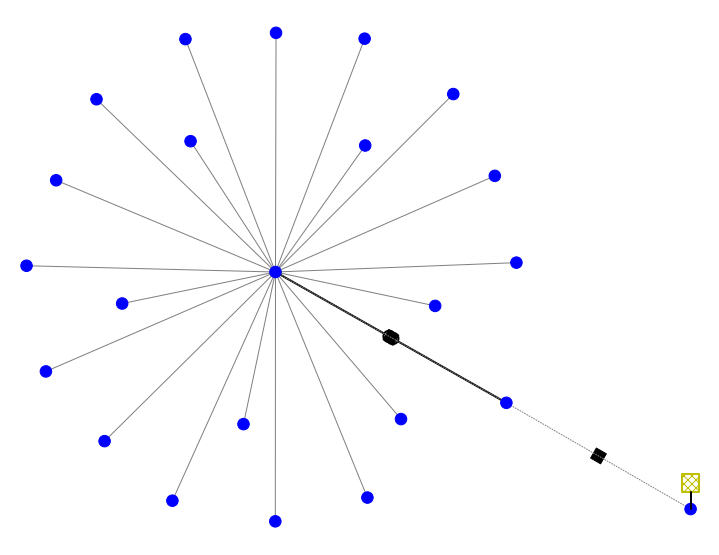

<AxesSubplot:>

In [17]:
simple_plot(net)

In [18]:
profiles = pd.read_csv('D:\\Glasgow substation model\\1 day power.csv', header=0, decimal=',')
profiles = profiles.astype('float64')
profiles=profiles/1000
ds = DFData(profiles)

In [19]:
ConstControl(net, element='load', variable='p_mw', element_index=[0],
                 data_source=ds, profile_name=["load1_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[1],
                 data_source=ds, profile_name=["load2_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[2],
                 data_source=ds, profile_name=["load3_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[3],
                 data_source=ds, profile_name=["load4_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[4],
                 data_source=ds, profile_name=["load5_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[5],
                 data_source=ds, profile_name=["load6_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[6],
                 data_source=ds, profile_name=["load7_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[7],
                 data_source=ds, profile_name=["load8_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[8],
                 data_source=ds, profile_name=["load9_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[9],
                 data_source=ds, profile_name=["load10_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[10],
                 data_source=ds, profile_name=["load11_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[11],
                 data_source=ds, profile_name=["load12_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[12],
                 data_source=ds, profile_name=["load13_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[13],
                 data_source=ds, profile_name=["load14_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[14],
                 data_source=ds, profile_name=["load15_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[15],
                 data_source=ds, profile_name=["load16_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[16],
                 data_source=ds, profile_name=["load17_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[17],
                 data_source=ds, profile_name=["load18_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[18],
                 data_source=ds, profile_name=["load19_p"])
ConstControl(net, element='load', variable='p_mw', element_index=[19],
                 data_source=ds, profile_name=["load20_p"])
ConstControl(net, element='load', variable='q_mvar', element_index=[0],
                 data_source=ds, profile_name=["load1_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[1],
                 data_source=ds, profile_name=["load2_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[2],
                 data_source=ds, profile_name=["load3_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[3],
                 data_source=ds, profile_name=["load4_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[4],
                 data_source=ds, profile_name=["load5_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[5],
                 data_source=ds, profile_name=["load6_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[6],
                 data_source=ds, profile_name=["load7_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[7],
                 data_source=ds, profile_name=["load8_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[8],
                 data_source=ds, profile_name=["load9_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[9],
                 data_source=ds, profile_name=["load10_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[10],
                 data_source=ds, profile_name=["load11_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[11],
                 data_source=ds, profile_name=["load12_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[12],
                 data_source=ds, profile_name=["load13_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[13],
                 data_source=ds, profile_name=["load14_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[14],
                 data_source=ds, profile_name=["load15_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[15],
                 data_source=ds, profile_name=["load16_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[16],
                 data_source=ds, profile_name=["load17_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[17],
                 data_source=ds, profile_name=["load18_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[18],
                 data_source=ds, profile_name=["load19_q"])
ConstControl(net, element='load', variable='q_mvar', element_index=[19],
                 data_source=ds, profile_name=["load20_q"])

This ConstControl has the following parameters: 

index:             39
json_excludes:     ['self', '__class__']

In [20]:
time_steps=range(0, 48)

In [23]:
run_timeseries(net, time_steps)


100%|██████████| 48/48 [00:02<00:00, 22.42it/s]


In [24]:
print(net.res_line.loading_percent)

0     0.372744
1     0.744934
2     0.586290
3     3.469128
4     3.648954
5     0.691013
6     1.047347
7     5.145438
8     1.695175
9     2.747342
10    2.826391
11    3.645381
12    1.168132
13    2.658395
14    2.909732
15    2.260966
16    1.784109
17    1.435053
18    4.287771
19    2.301592
Name: loading_percent, dtype: float64
